In [15]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

####  In this notebook, the author will look at building commencement notices which are statutory documents issued by the Planning Control Authorities.  When a development has been given planning permission and *construction* works are about to begin, developers submit the notices.  The notices are a good way of monitoring the number of construction projects being built across Ireland. 

####  We shall look at the commencement notices for three different years. The data dictionary reads: Local Authority -  Name of Irish County or major Irish city. Jan, Feb, Mar (and so on) - Month of Year.  The author created a new variable "Year" - the year to which the records relate. 

In [16]:
df2017=pd.read_csv("bcms_commencement_notices_2017.csv")
df2020=pd.read_csv("bcms_commencement_notices_2020.csv")
df2021=pd.read_csv("bcms_commencement_notices_2021.csv")
df2017['Year'] = '2017'
df2020['Year'] = '2020'
df2021['Year'] = '2021'

In [17]:
df2017.head(1) #### Check columns for spaces

,Local Authority,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Year
0,Carlow County,4,1,3,3,9,10,10,4,5,7,5,9,2017


In [22]:
df=df2017.append(df2020) #### join two datasets together.  2017 and 2020, for example.
#dfX=df.append(df3)
df.rename(columns = {'Local Authority':'Authority'}, inplace = True) #  Remove spaces from "Local Authority"
# After renaming the columns check feature
print("\nAfter modifying first column:\n", df.columns)


After modifying first column:
 Index(['Authority', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Year'],
      dtype='object')


In [23]:
print(df.shape)

(66, 14)


In [24]:
# 
df.Authority = df.Authority.astype("category") ### change column datatype(s) for the sake of efficiency and speed



In [25]:
df.corr() ###  Correlations amongst variables

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Jan,1.000000,0.971688,0.936874,0.841286,0.845997,0.925422,0.936819,0.938590,0.943268,0.952493,0.931716,0.944722
Feb,0.971688,1.000000,0.949836,0.827435,0.856078,0.916818,0.948071,0.943166,0.947315,0.948059,0.929286,0.953890
Mar,0.936874,0.949836,1.000000,0.905001,0.915657,0.959653,0.977506,0.965787,0.983650,0.956832,0.968403,0.944414
Apr,0.841286,0.827435,0.905001,1.000000,0.967293,0.965405,0.911356,0.899515,0.897055,0.907032,0.945656,0.791408
May,0.845997,0.856078,0.915657,0.967293,1.000000,0.964137,0.930631,0.912831,0.912347,0.908247,0.943463,0.817041
June,0.925422,0.916818,0.959653,0.965405,0.964137,1.000000,0.966396,0.951799,0.958441,0.957832,0.978246,0.888412
July,0.936819,0.948071,0.977506,0.911356,0.930631,0.966396,1.000000,0.957449,0.980368,0.955013,0.963130,0.943830
Aug,0.938590,0.943166,0.965787,0.899515,0.912831,0.951799,0.957449,1.000000,0.965920,0.966949,0.949489,0.932340
Sept,0.943268,0.947315,0.983650,0.897055,0.912347,0.958441,0.980368,0.965920,1.000000,0.963320,0.963344,0.946143
Oct,0.952493,0.948059,0.956832,0.907032,0.908247,0.957832,0.955013,0.966949,0.963320,1.000000,0.968733,0.926081


In [27]:
#import calendar
import seaborn as sns
sns.set(color_codes=True)
#%matplotlib inline

In [28]:
#import pandas as pd
import researchpy as rp
import scipy.stats as stats

### 5 statistical tests

###  Let's check if the population variances are equal.  Three columns were chosen at random.  H0 states that the variances were homogenous.

In [32]:
###  Homogeneity of variance Levene Number (1)
import scipy.stats as stats

#Levene's test centered at the mean
stats.levene(df.Mar, df.Apr, df.May, center='mean')
###  Three months data

LeveneResult(statistic=0.1856309957646457, pvalue=0.8307266264657903)

###  p-value is not less than 0.05. In other words, the three groups have equal variances.  H0 has been supported.

<Figure size 640x480 with 0 Axes>

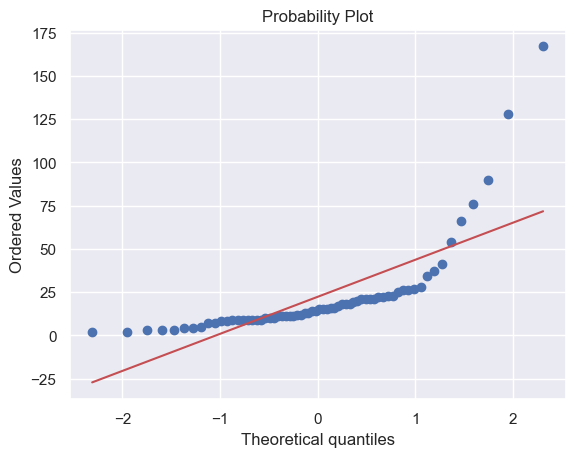

<Figure size 640x480 with 0 Axes>

In [33]:
#Normality plot.  Plot no. 1.

stats.probplot(df.Mar, plot=plt)
plt.figure()

 The above graph shows the number of notices received in 2017 and 2020 plotted  against the standard normal distribution.  They are very similar.

In [35]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

### ANOVA, which stands for Analysis of Variance, is a 'statistical test used to analyze the difference between the means of more than two groups' (www.scribbr.com)

In [38]:
#ONE-WAY ANOVA  Number (2)
model = ols('Mar~June', data = df).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df        sum_sq       mean_sq           F        PR(>F)
June       1.0  46297.266980  46297.266980  745.442453  5.627096e-37
Residual  64.0   3974.854232     62.107097         NaN           NaN


####  H0 states that the there is no difference between the means for commencement notices received from March-June in the dataset.  P <.05.  We reject H0.  The means are significantly different.

###  According to www.statology.com, A Mann-Whitney U test is non-parametric and it's used to compare the differences between two samples when the sample sizes are small (n <30).

In [39]:
# Mann-Whitney U test Number (3)
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# 
# choose two independent samples
data1 = df2017.Mar
data2 = df2017.June
#data3 = df.July
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=487.000, p=0.464
Same distribution (fail to reject H0)


###  H0 states that the means are equal.  We accept H0 and reject H1 as p > 0.05.  The means are equal.

####  Wilcoxon signed-rank test is a non parametric version of a student t-test.  H0 proposes that the samples come from the same distribution.

In [42]:
# Number  (4)
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = df2017.Jan
data2 = df2020.Jan
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=149.500, p=0.141
Same distribution (fail to reject H0)


####  We fail to reject H0.  The samples share the same distribution.  This stands to reason.  Most commencement notices are submitted when the weather is good.  We would expect very little difference between the mean no. of records submitted in January of 2017 and January of 2020.

#### Test (5) Chi square: to see if the mean average no. of records submitted (each month) was independent of whether there was covid (2020) or no covid (2017)

In [46]:
print(df2017.mean())
print(df2020.mean())

Jan      1.421212e+01
Feb      1.909091e+01
Mar      2.375758e+01
Apr      2.381818e+01
May      2.609091e+01
June     2.633333e+01
July     2.330303e+01
Aug      2.154545e+01
Sept     2.233333e+01
Oct      2.339394e+01
Nov      2.393939e+01
Dec      1.412121e+01
Year    6.112732e+129
dtype: float64
Jan      1.545455e+01
Feb      1.927273e+01
Mar      2.072727e+01
Apr      1.212121e+01
May      1.248485e+01
June     1.884848e+01
July     2.018182e+01
Aug      1.690909e+01
Sept     2.048485e+01
Oct      2.124242e+01
Nov      1.936364e+01
Dec      1.675758e+01
Year    6.121824e+129
dtype: float64


In [48]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [14.212121,19.090909,23.757576,23.818182,26.090909,26.333333,23.30303,21.545455,22.333333,23.393939,23.939394,14.121212] ## 2017, 
[15.454545,19.272727,20.727273,12.121212,12.484848,18.848485,20.181818,16.909091,20.484848,21.242424,19.363636,16.757576] ## 2020
stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


###  The mean no. of records are independent of each other for the categories of Year(Covid) or Year(no Covid).

###  This is surprising.  One would expect that since we went into lockdown in 2020 (March) that the number of commencement notices submitted would drastically decrease.  Perhaps when covid restrictions were lifted, builders simply submitted the notices and tried to make up for lost time.

###  Conclusions

In [64]:
#### Let us group the counties by province for clarity.

In [65]:
counties = ['Galway County','Galway City','Mayo County','Leitrim County','Roscommon County','Sligo County','Dublin City','South Dublin County','Fingal County','Dun-Laoghaire Rathdown','Greater Dublin Area','Dublin Local Authorities','Carlow County','Kildare County','Kilkenny County','Laois County','Longford County','Louth County','Meath County','Offaly County','Westmeath County','Wexford County','Wicklow County','Clare County','Cork County','Cork City','Kerry County','Limerick County','Tipperary County','Waterford County','Cavan County','Donegal County','Monaghan County']
provinces=['Connaught']*6 +["Dublin Area"]*6 + ["Leinster"]*11 + ["Munster"]*7 + ["Ulster"]*3
df1=pd.DataFrame({'County': counties,
                'Province':provinces})

In [66]:
print(df1.groupby('Province')['County'].apply(list))

Province
Connaught      [Galway County, Galway City, Mayo County, Leit...
Dublin Area    [Dublin City, South Dublin County, Fingal Coun...
Leinster       [Carlow County, Kildare County, Kilkenny Count...
Munster        [Clare County, Cork County, Cork City, Kerry C...
Ulster           [Cavan County, Donegal County, Monaghan County]
Name: County, dtype: object


In [67]:
df1

,County,Province
0,Galway County,Connaught
1,Galway City,Connaught
2,Mayo County,Connaught
3,Leitrim County,Connaught
4,Roscommon County,Connaught
5,Sligo County,Connaught
6,Dublin City,Dublin Area
7,South Dublin County,Dublin Area
8,Fingal County,Dublin Area
9,Dun-Laoghaire Rathdown,Dublin Area


###   Sum up all the records by month for each county.

In [68]:
column_sums=df2017.iloc[:,0:13].sum()
print(column_sums)

Local Authority    Carlow CountyCavan CountyClare CountyCork City...
Jan                                                              469
Feb                                                              630
Mar                                                              784
Apr                                                              786
May                                                              861
June                                                             869
July                                                             769
Aug                                                              711
Sept                                                             737
Oct                                                              772
Nov                                                              790
Dec                                                              466
dtype: object


### Sum up all the records for each county/administrative area from Jan-Dec 2017

In [70]:
row_sums=df2017.sum(axis=1)
print(row_sums)
### Rows 0-32 are the local authorities obviously.

0       70
1       93
2      175
3       54
4      794
5      234
6      198
7      183
8      249
9       37
10     373
11     222
12     313
13     161
14     133
15      28
16     211
17      48
18     206
19     259
20     458
21     130
22      86
23      96
24      83
25     159
26     154
27     125
28     128
29     273
30     178
31     789
32    1944
dtype: int64


In [ ]:
### Bartlett's test is used to check the null hypothesis, H0 that all the population variances (in a sample) are equal. The alternative states that at least two are different.

In [71]:
### check for homogeneity of variance using Bartlett's test (test 6)
import scipy.stats as stats

w, pvalue = stats.bartlett(df2017['Jan'], df2017['Feb'], df2017['Mar'], df2017['Apr'],df2017['May'],df2017['June'],df2017['July'],df2017['Aug'],df2017['Sept'],df2017['Oct'],df2017['Nov'],df2017['Dec'])
print(w, pvalue)

25.382030783356225 0.008011899015657482


###  We reject H0. P < 0.05. At least two categories (months) have different variances.  That makes sense.  The volume of notices submitted is higher in the Spring and Summer than Winter and Autumn.

###  Let's plot the normal distribution.

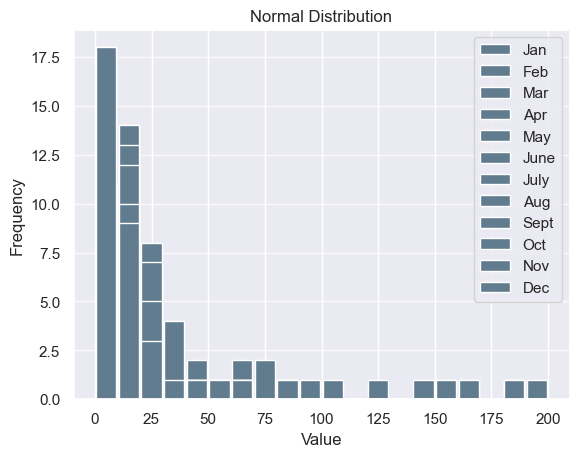

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

df = df2017

df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

###  Let's plot the histogram for a given year.

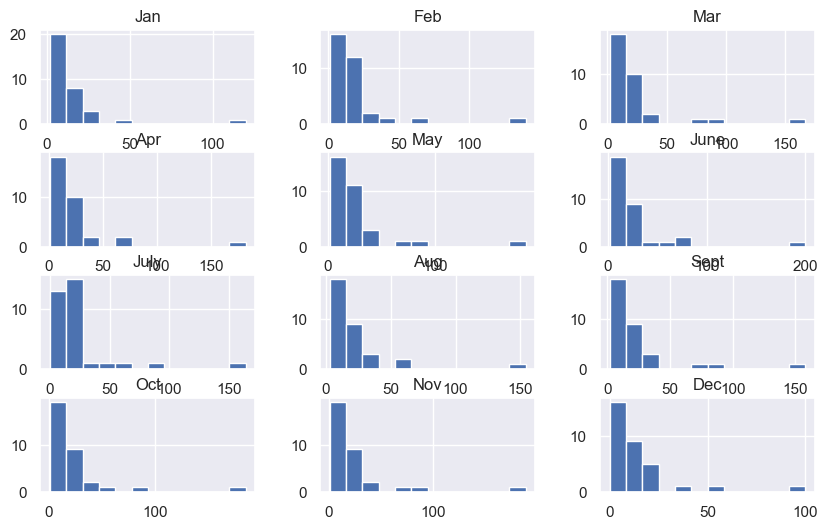

In [79]:
### A histogram is a graph that displays the frequency of values for a given variable.
### creating a basic histogram
df2017.hist(figsize=[10, 6], bins=12)
plt.show()

array([[<Axes: title={'center': 'Jan'}>]], dtype=object)

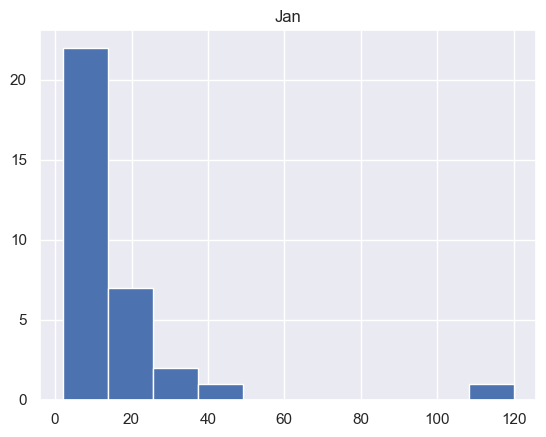

In [83]:
df2017.hist(column='Jan')  ### For a given month

###  Let's plot the July figures of no. of commencement notices submitted.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

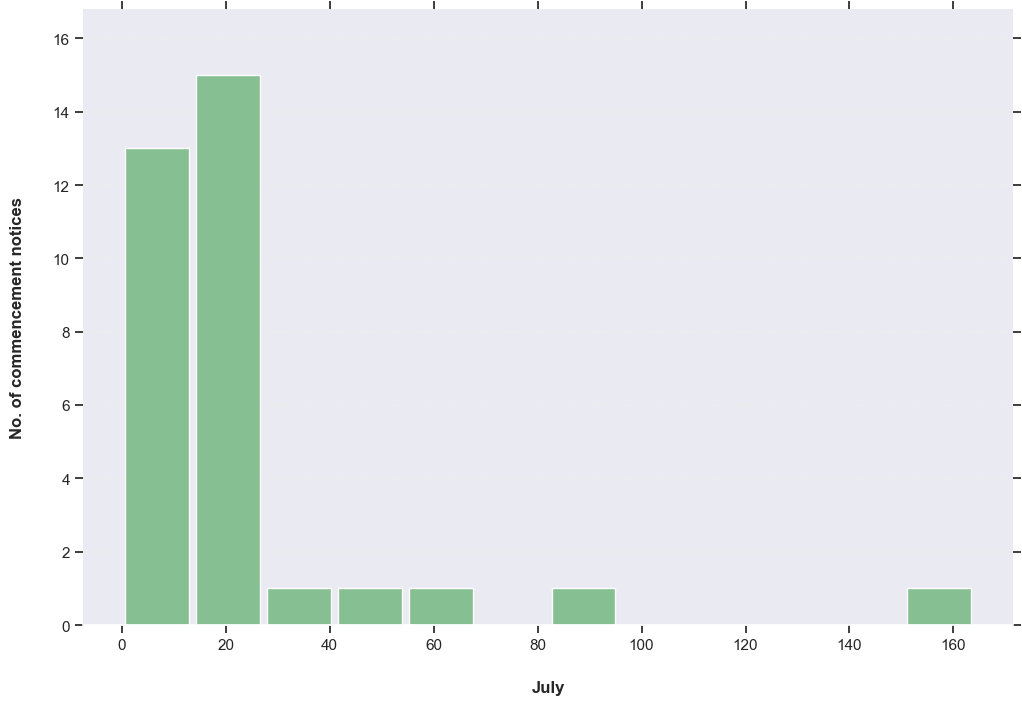

In [85]:
ax = df.hist(column='July', bins=12, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("July", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("No. of commencement notices", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [97]:
###  Undertake research to find similarities between some country(s) against Ireland.  Use five tests

In [98]:
dfCompare = pd.read_excel("outputukhousebuilding.xlsx", sheet_name="2a",skiprows=5)

In [99]:
dfCompare.drop(columns=dfCompare.columns[0], axis=1, inplace=True)
dfCompare

,Period,Started - All Dwellings,Started - Private Enterprise,Started - Housing Associations,Started - Local Authorities,Completed - All Dwellings,Completed - Private Enterprise,Completed - Housing Associations,Completed - Local Authorities
0,1969-70,357070,171470,10060,175550,378320,185920,7390,184970
1,1970-71,330950,169150,8600,153210,362220,174350,8510,179370
2,1971-72,358610,212200,11260,135160,364480,196300,10710,157460
3,1972-73,361850,232720,9740,119500,330930,200770,7780,122400
4,1973-74,338000,220660,11200,106150,304630,191090,8990,104580
5,1974-75,260360,108960,12040,139380,280200,144890,10050,125260
6,1975-76,333090,153410,19490,160200,321350,153940,14740,152690
7,1976-77,337740,158030,..,150440,324380,155060,..,153530
8,1977-78,275930,138800,28610,108520,314310,144140,..,145010
9,1978-79,272010,161570,20860,89600,287850,151970,22830,113060


In [100]:
dfCompare.columns = dfCompare.columns.str.replace('Started - All Dwellings', 'Started_All_Dwellings')
dfCompare.columns = dfCompare.columns.str.replace('Completed - All Dwellings', 'Completed_All_Dwellings')
dfCompare.columns

Index(['Period', 'Started_All_Dwellings', 'Started - Private Enterprise',
       'Started - Housing Associations', 'Started - Local Authorities',
       'Completed_All_Dwellings', 'Completed - Private Enterprise',
       'Completed - Housing Associations', 'Completed - Local Authorities'],
      dtype='object')

In [102]:
dfCompare=dfCompare[["Period","Started_All_Dwellings","Completed_All_Dwellings"]]
dfCompare.head(1)

,Period,Started_All_Dwellings,Completed_All_Dwellings
0,1969-70,357070,378320


In [105]:
###  Test 1
###  Homogeneity of variance Levene Number (1)
import scipy.stats as stats

#Levene's test centered at the mean
stats.levene(dfCompare.Started_All_Dwellings, dfCompare.Completed_All_Dwellings, center='mean')
###  


LeveneResult(statistic=0.02729964132862511, pvalue=0.8690868189692189)

####  H0 states that we have homogeneity of variance in our samples.  p> 0.05, H0 is supported.  In our Irish sample, H0 was also supported.

In [104]:
### Test 2
#ONE-WAY ANOVA  Number (2)
model = ols('Started_All_Dwellings~Completed_All_Dwellings', data = dfCompare).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

                           df        sum_sq       mean_sq           F  \
Completed_All_Dwellings   1.0  1.706453e+11  1.706453e+11  315.529821   
Residual                 51.0  2.758190e+10  5.408216e+08         NaN   

                               PR(>F)  
Completed_All_Dwellings  1.719878e-23  
Residual                          NaN  


#  H0 states that the means are equal.  P <0.05.  We reject H0.  The means are not equal.  Similarly, H0 was not supported for the Irish sample.

In [106]:
###  Test 3
# Mann-Whitney U test Number (3)
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# 
# choose two independent samples
data1 = dfCompare.Started_All_Dwellings
data2 = dfCompare.Completed_All_Dwellings
#
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=1397.000, p=0.965
Same distribution (fail to reject H0)


###  H0 states that our samples come from the same distribution.  P<0.05.  We accept H0.  We accepted H0 for this Irish sample too.

In [107]:
# Number  (4)
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = dfCompare.Started_All_Dwellings
data2 = dfCompare.Completed_All_Dwellings
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=687.000, p=0.801
Same distribution (fail to reject H0)


###  H0 is supported. p>0.05.  In the Irish dataset, we also failed to reject H0.

In [109]:
### check for homogeneity of variance using Bartlett's test (test 5)
import scipy.stats as stats

w, pvalue = stats.bartlett(dfCompare['Started_All_Dwellings'], dfCompare['Completed_All_Dwellings'])
print(w, pvalue)

0.027113287379013078 0.8692107138961213


###  H0 is supported.  p>0.05. We observe similar variances. Incidentally, Ha was *supported* and H0 was *rejected* for the Irish dataset. 

In [ ]:
####  Learning outcomes. 1.  To find an Irish dataset was easy, to find a good foreign dataset was not. 2.  The UK dataset and Irish datasets shared some statistical similarities but some distinct differences. 3.  Covid played a part in delays in the construction of buildings in Ireland in 2020. 4.  Statistics has a large part to play in helping us to plan for the future with respect to con